# Exploratory Data Analysis - Terrorism
* The task is to - Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
* And anwers the question - As a security/defense analyst, try to find out the hot zone of terrorism.
* Finally answer all - What all security issues and insights you can derive by EDA?
* Dataset:<a target="_blank" href="https://bit.ly/2TK5Xn5">Click Here.</a>
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.0tp0ms3QeaPANegslC6x4wHaEK%26pid%3DApi&f=1">
</figure>

## Author - Ansari Mohammed Ali Nasim

In [1]:
#loading necessary library
import pandas as pd  #for loading the datasets
import numpy as np  #for numerical computations
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns  #for visualization

In [2]:
# to ignore the warnings
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
#loading the dataset
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin1')

#printing the first five rows of the dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


So out dataframe is loaded..!!

It is a big dataset consisting of 135 columns. So let done some preprocessing before doing EDA of the data.
## Preprocessing

In [4]:
#checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
#checking null values
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
#dropping all the null values
df.dropna(axis=1, inplace=True)

In [7]:
# printing info after deleting null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

In [8]:
# printing dataset
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [9]:
#checking the statistics
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,...,0.036507,3.247547,8.439719,0.002950,6.447325,-0.544556,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,...,0.187549,1.915772,6.653838,0.054234,2.173435,3.122889,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,4.000000,0.000000,6.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,14.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So Our data is in a good shape and we are good to move on to the EDA of dataset
## Exploratory Data Analysis

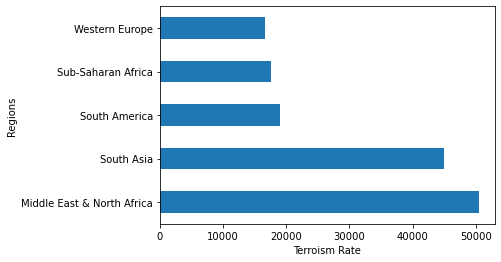

In [10]:
# grouping the eventid by region
new_df = df.groupby('region_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graph
new_df[:5].plot(kind="barh")
plt.xlabel("Terroism Rate")
plt.ylabel("Regions")

###### Interpretation - 
* So the Middle East & North Africa and South Asia have highest number of terrorist in comparison with other regions from the year 1970 to 2017

Lets further dig into this region to find out country wise hot zone in terms of terrorism.

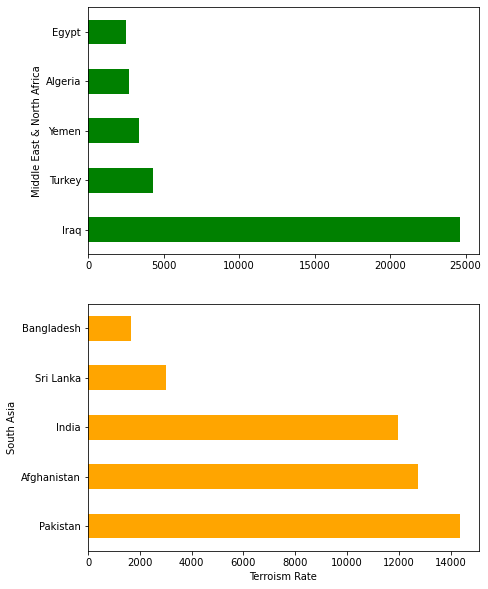

In [11]:
#grouping eventid by country wise
middle_east = df[df['region_txt'] == "Middle East & North Africa"]
new_df1 = middle_east.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

south_asia = df[df['region_txt'] == "South Asia"]
new_df2 = south_asia.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graph
plt.figure(figsize=(7, 10))
ax1 = plt.subplot(211)
new_df1[:5].plot(kind='barh', ax=ax1, color="green")
ax1.set_ylabel("Middle East & North Africa")
ax2 = plt.subplot(212)
new_df2[:5].plot(kind='barh', ax=ax2, color="orange")
plt.xlabel("Terroism Rate")
ax2.set_ylabel('South Asia')

###### Interpretation - 
* In Middle East & North Africa, Iraq is showing highest number of terror rate
* In South Asia, Pakistan, Afghanistan and India is showing highest number of terror rate

The above Analysis contains terrorism rate from year from 1970 to 2017 but if we only analyze the 20s years, is there any special trends we will find or not..???  

Lets see by analysis from year 2000 to 2017 the terrorism rate of different regions

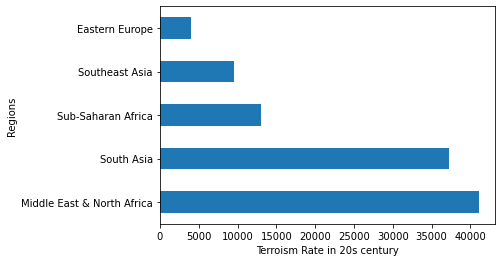

In [12]:
#slicing the 20s years from the dataframe
start = df['iyear'] >= 2000
end = df['iyear'] <= 2017
twenty_years = df[start & end]

#grouping the eventid by region
new_df = twenty_years.groupby('region_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graph
new_df[:5].plot(kind="barh")
plt.xlabel("Terroism Rate in 20s century")
plt.ylabel("Regions")

###### Interpretation - 
* So after considering the twenty's years we have same results in regions i.e. Middle East & North Africa and South Asia have highest number of terrorist but there is some decrease in the terrorism rate by 100000

Lets see if there is any different trends if we further dig into the regionwise terrorism count

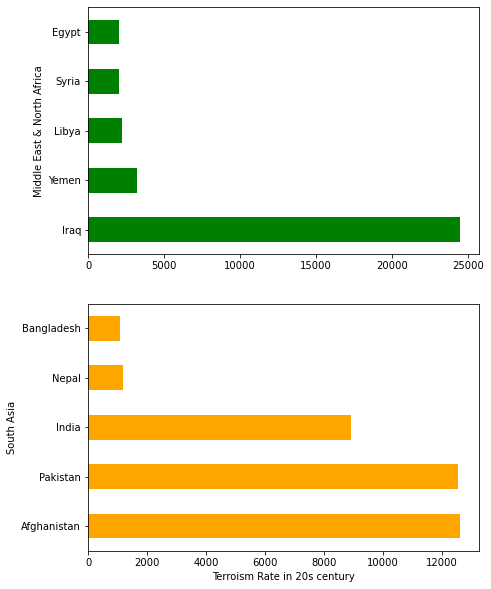

In [13]:
#grouping eventid by country wise
middle_east = twenty_years[twenty_years['region_txt'] ==
                           "Middle East & North Africa"]
new_df1 = middle_east.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

south_asia = twenty_years[twenty_years['region_txt'] == "South Asia"]
new_df2 = south_asia.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graphs
plt.figure(figsize=(7, 10))
ax1 = plt.subplot(211)
new_df1[:5].plot(kind='barh', ax=ax1, color="green")
ax1.set_ylabel("Middle East & North Africa")
ax2 = plt.subplot(212)
new_df2[:5].plot(kind='barh', ax=ax2, color="orange")
plt.xlabel("Terroism Rate in 20s century")
ax2.set_ylabel('South Asia')

###### Interpretation - 
* After region-wise analyzing the terrorist rate, we found that Iraq is having some terrorism rate as that of 1970-2017 but the terrorism rate is decreased in South Asia by 2000 in Pakistan and Afghanistan while in India there is a suprising decrease in the terrorism rate from 12000 to around 8500.

Lets see the hot zone if we consider the how long terrorist activity extended then would there any other trends we find or not ???

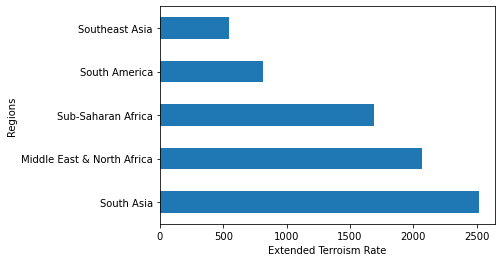

In [14]:
##slicing the dataframe if terrorism activity is extended
extended = df[df['extended'] == 1]

# grouping the eventid by region
new_df = extended.groupby('region_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graph
new_df[:5].plot(kind="barh")
plt.xlabel("Extended Terroism Rate")
plt.ylabel("Regions")

###### Interpretation - 
* By considering the terrorism rate is extended we find that South Asia has highest number of extended terrorist activity and second highest is Middle East & North Africa
* And we have new region coming forward which is Sub-Saharan Africa as the 3rd highest number of extended terrorist activity.

Lets see by further digging the extended terrorist rate in these three region-wise what trends do we see.

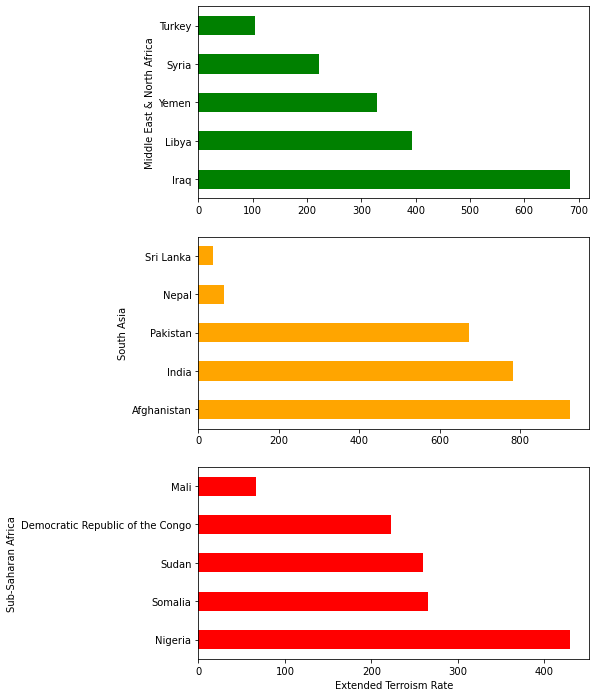

In [15]:
#grouping eventid by country wise
middle_east = extended[extended['region_txt'] == "Middle East & North Africa"]
new_df1 = middle_east.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

south_asia = extended[extended['region_txt'] == "South Asia"]
new_df2 = south_asia.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

saharan_africa = extended[extended['region_txt'] == "Sub-Saharan Africa"]
new_df3 = saharan_africa.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graphs
plt.figure(figsize=(7, 12))
ax1 = plt.subplot(311)
new_df1[:5].plot(kind='barh', ax=ax1, color="green")
ax1.set_ylabel("Middle East & North Africa")

ax2 = plt.subplot(312)
new_df2[:5].plot(kind='barh', ax=ax2, color="orange")
ax2.set_ylabel('South Asia')

ax3 = plt.subplot(313)
new_df3[:5].plot(kind='barh', ax=ax3, color="red")
plt.xlabel("Extended Terroism Rate")
ax3.set_ylabel('Sub-Saharan Africa')

###### Interpretation - 
* While considering region-wise extended terrorism activity in Middle East & North Africa, there is a suprising trends came forward which is three countries having extended terrorism activity - Iraq, Libya and Yemen.
* And in South Asia, Afghanistan has the highest extended terrorism rate , India being the 2nd and Paskistan is the 3rd.

Lets see the success rate of terrorism activity

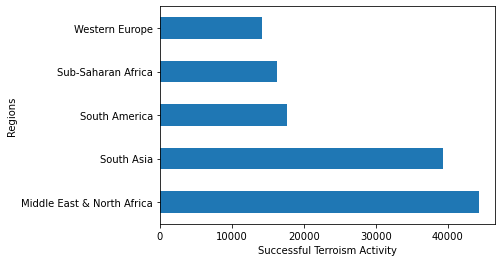

In [16]:
##slicing the dataframe if terrorism activity is extended
success = df[df['success'] == 1]

# grouping the eventid by region
new_df = success.groupby('region_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graph
new_df[:5].plot(kind="barh")
plt.xlabel("Successful Terroism Activity")
plt.ylabel("Regions")

###### Interpretation - 
* After considering the Succesful Terrorism Activity Rate , we have found same trends in the regions means Middle East & North Africa and South Asia taking the lead.

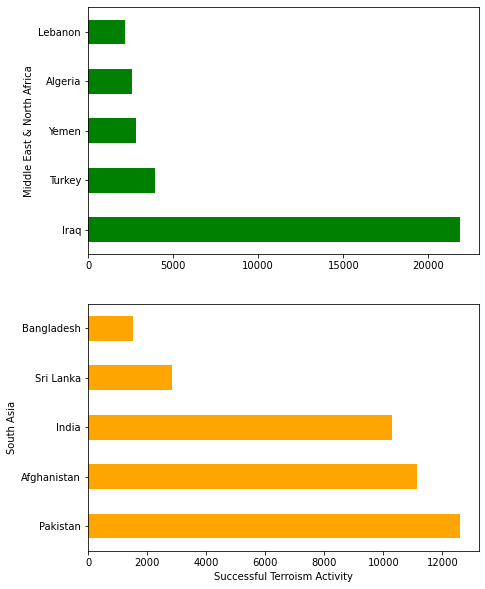

In [17]:
#grouping eventid by country wise
middle_east = success[success['region_txt'] == "Middle East & North Africa"]
new_df1 = middle_east.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

south_asia = success[success['region_txt'] == "South Asia"]
new_df2 = south_asia.groupby('country_txt')['eventid'].count().sort_values(
    ascending=False)

#plotting the graphs
plt.figure(figsize=(7, 10))
ax1 = plt.subplot(211)
new_df1[:5].plot(kind='barh', ax=ax1, color="green")
ax1.set_ylabel("Middle East & North Africa")
ax2 = plt.subplot(212)
new_df2[:5].plot(kind='barh', ax=ax2, color="orange")
plt.xlabel("Successful Terroism Activity")
ax2.set_ylabel('South Asia')

###### Interpretation - 
* So the result from the success rate is same as that of the first grouping that we have done

Lets see the overall terrorism activity rate all over years ranging from 1970-2017

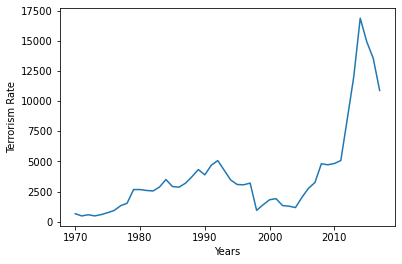

In [18]:
#overall terrorism activity rate
new_df = df.groupby('iyear')['eventid'].count()

#plotting the graph
new_df.plot(kind="line")
plt.xlabel("Years")
plt.ylabel("Terrorism Rate")

###### Interpretation - 
* From the above graph , it is easily seen that there was a sudden increase in the terrorism rate after 2010 
Finally lets see the country wise terrorism all over the years 

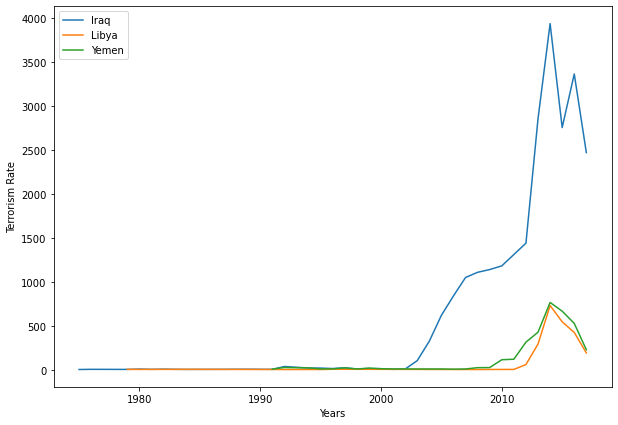

In [19]:
#terrorism rate of all the Middle East & North Africa hot zones
iraqdf = df[df['country_txt'] == "Iraq"]
iraq = iraqdf.groupby('iyear')['eventid'].count()

Libyadf = df[df['country_txt'] == "Libya"]
Libya = Libyadf.groupby('iyear')['eventid'].count()

yemendf = df[df['country_txt'] == "Yemen"]
yemen = yemendf.groupby('iyear')['eventid'].count()

#plotting the graph
plt.figure(figsize=(10, 7))

iraq.plot(kind="line")
Libya.plot(kind="line")
yemen.plot(kind="line")

plt.xlabel("Years")
plt.ylabel("Terrorism Rate")
plt.legend(labels=["Iraq", "Libya", "Yemen"])
plt.show()

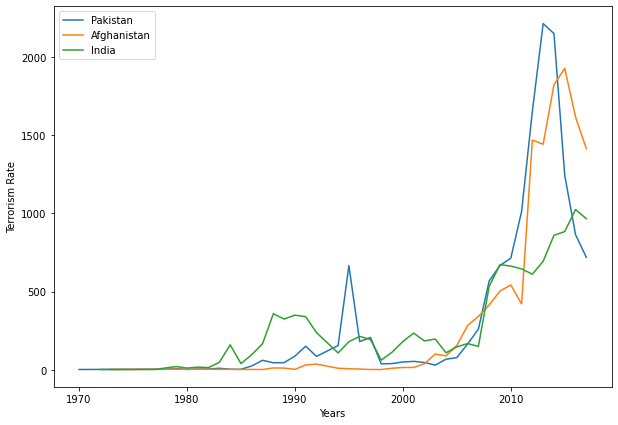

In [20]:
#terrorism rate of all the South Asia hot zones
pakistandf = df[df['country_txt'] == "Pakistan"]
pakistan = pakistandf.groupby('iyear')['eventid'].count()

afghanistandf = df[df['country_txt'] == "Afghanistan"]
afghanistan = afghanistandf.groupby('iyear')['eventid'].count()

indiadf = df[df['country_txt'] == "India"]
india = indiadf.groupby('iyear')['eventid'].count()

#plotting the graphs
plt.figure(figsize=(10, 7))
pakistan.plot(kind="line")
afghanistan.plot(kind="line")
india.plot(kind="line")
plt.xlabel("Years")
plt.ylabel("Terrorism Rate")
plt.legend(labels=["Pakistan", "Afghanistan", "India"])
plt.show()

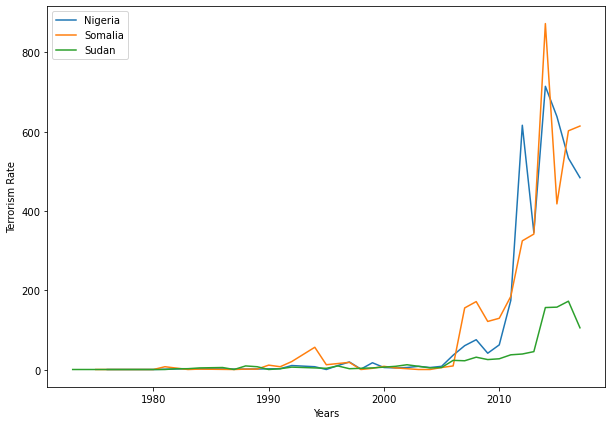

In [21]:
#terrorism rate of all the Sub-Saharan Africa hot zones
nigeriadf = df[df['country_txt'] == "Nigeria"]
nigeria = nigeriadf.groupby('iyear')['eventid'].count()

somaliadf = df[df['country_txt'] == "Somalia"]
somalia = somaliadf.groupby('iyear')['eventid'].count()

sudandf = df[df['country_txt'] == "Sudan"]
sudan = sudandf.groupby('iyear')['eventid'].count()

#plotting the graph
plt.figure(figsize=(10, 7))
nigeria.plot(kind="line")
somalia.plot(kind="line")
sudan.plot(kind="line")
plt.xlabel("Years")
plt.ylabel("Terrorism Rate")
plt.legend(labels=["Nigeria", "Somalia", "Sudan"])
plt.show()

## Conclusion -
* So after different type of analyzation ,Overall terrorism is suddenly increased from 2010 and I have ranked the Hot zone in terms of terrorist activities in all regions - 

<ol><p><b>Middle East & North Africa</b></p>
    <li><b>Iraq</b> - Overall having highest Number of terrorist rate and sudden increase in terrorist activity after year 2010</li>
    <li><b>Libya</b> - Overall having low terrorism activity, Second Highest in terms of successful terrorist activities which takes place in this country and an increased in terrorism rate after 2010. </li>
    <li><b>Yemen</b>- Overall having low terrorism activity, Third Highest in terms of successful terrorist activities which takes place in this country and an increased in terrorism rate after 2010.</li>
<p><b>South Asia</b></p>
    <li><b>Pakistan</b> - Overall having 1st highest terrorist rates but if we consider extended terrorist rate so this country is 2nd highest and a very high increase in terrorism rate after 2010.</li>
    <li><b>Afghanistan</b> - Overall having 2nd Highest terrorist rates and 1st highest in terms of extended terrorist rates and a very high increase in terrorism rate after 2010.</li>
    <li><b>India</b> - Overall having 3rd highest terrorist rates but there is a good decrease in terrorist rates if we consider the 20s century and an increase in terrorism rate after 2010 but not as that of increase like Afghanistan and Pakistan.</li>
    <p><b>Sub-Saharan Africa</b></p>
    <li><b>Nigeria</b>- Overall having low terrorism activity but 1st Highest in terms of extended terrorist activities which takes place in this country and 2nd in terms of increased of terrorism rate after 2010.</li>
    <li><b>Somalia</b>- Overall having low terrorism activity but 2nd Highest in terms of extended terrorist activities which takes place in this country and 1st in terms of increased of terrorism rate after 2010.</li>
    <li><b>Sudan</b>- Overall having low terrorism activity but 3rd Highest in terms of extended terrorist activities which takes place in this country and a bit increase in terrorism rate after 2010.</li>
</ol>

#### Article -
The impact of terrorism has increased significantly since 2000, according to Vision of Humanity's Global Terrorism Index 2015. There has been a more than ninefold increase in deaths from terrorism during this time - from 3,329 at the turn of the century, to 32,685 in 2014. From 2013 to 2014 alone, there was an 80% increase in deaths.

The year 2014 was the worst on record for terrorism across the globe.

Terrorism remains highly concentrated in just five countries - 78% of deaths in 2014 were in Iraq, Nigeria, Pakistan, Afghanistan and Syria. However, the report argues that the impact of terrorism is spreading. In 2013, five countries experienced more than 500 deaths; in 2014 this number rose to 11. Sixty-seven countries experienced at least one death from terrorism last year - up from 59 the previous year.

The index includes an interactive map highlighting the impact of terrorism around the world. What does this tell us about the changing global situation?

<img src="https://weforum-assets-production.s3-eu-west-1.amazonaws.com/editor/large_h1ftBaRZOw3_CPMSWWrjmPHZlzcCFcopUx3snCIo72k.png">

The above article is from - <a href="https://www.weforum.org/agenda/2016/03/how-has-terrorism-changed-since-2000" target="_blank">World Economic Forum.</a>

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.KMPYUPD3ft8Pds4wGbXCbQHaFR%26pid%3DApi&f=1">
<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic1.businessinsider.com%2Fimage%2F53cd553d6bb3f766010d428d-1200-858%2Fscreen%2520shot%25202014-07-21%2520at%25201.59.41%2520pm.png&f=1&nofb=1">

## Thank You